In [1]:
# Make simulated data 
x <- 1:20
y <- 1:20

df <- data.frame(x=rep(1:20, 20), y=rep(1:20, each=20))

df$v1 <- 0.04*df$x + rnorm(400, 0, 0.2)
df$v2 <- 0.07*df$x + 0.2*df$y - 0.05*df$x * df$y + rnorm(400, 0, 0.2)
df$v3 <- df$v1 * rnorm(400, 1, 0.2)
df$v4 <- df$v2 * rnorm(400, 1, 0.6)
df$v5 <- 3*sin(df$x) + log(df$y) + rnorm(400, 0, 0.5)
df$v6 <- (abs(df$x - df$y))^2 + rnorm(400, 0, 5)

In [2]:
head(df)

x,y,v1,v2,v3,v4,v5,v6
1,1,0.3277771,0.25157541,0.31026947,0.209442769,2.0582977,-2.371458
2,1,0.2723134,0.19543477,0.23175797,0.304515028,2.9349596,-3.924469
3,1,0.3629680,-0.07802370,0.32653783,-0.004824218,0.7914931,9.368873
4,1,0.1067052,0.44667168,0.12396852,0.585209297,-2.5662348,10.651915
5,1,-0.1002563,-0.02902217,-0.09494731,-0.044011699,-3.2788635,18.223829
6,1,0.2408026,0.22744533,0.25973481,0.254564076,-1.4924739,28.879022


In [3]:
df2matrix <- function(df, var) {
  m <- matrix(nrow=20, ncol=20)
  for (i in 1:nrow(df)) {
    x <- df[i, 'x']
    y <- df[i, 'y']
    val <- df[i, var]
    m[x, y] <- val
  }
  m
}

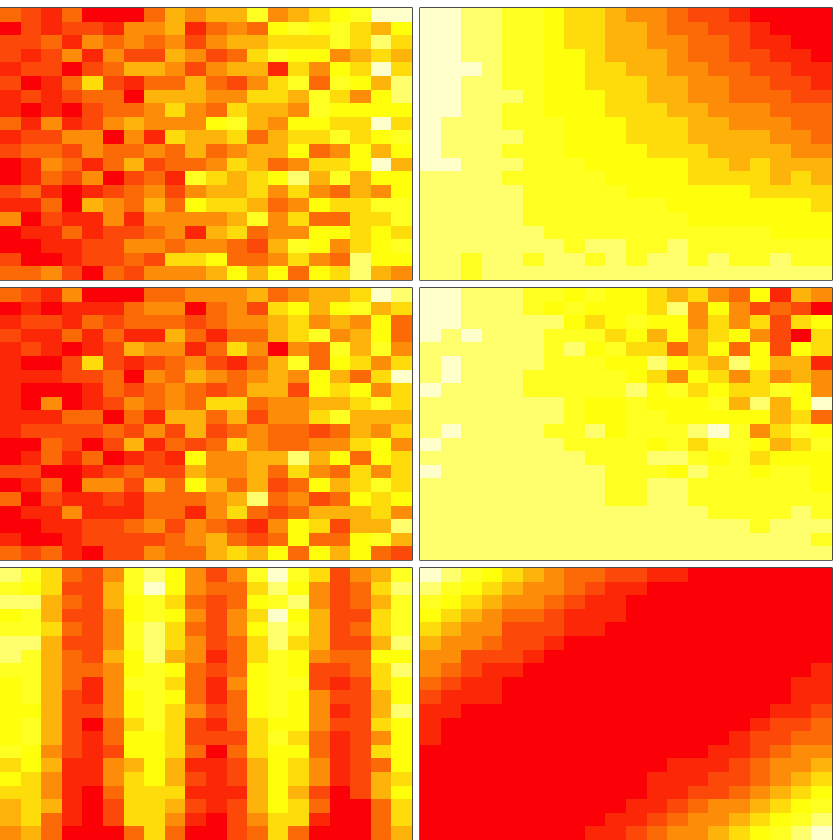

In [4]:
par(mfrow=c(3, 2))
par(mar=c(0, 0, 0.5, 0.5))
for (i in 1:6) {
  image(df2matrix(df, paste('v', i, sep='')), xaxt='n', yaxt='n')    
}

In [5]:
for (i in 1:6) {
  cat(sprintf('%d: [%.2f, %.2f]\n', 
              i, 
              quantile(df[, paste('v', i, sep='')], prob=0.1), 
              quantile(df[, paste('v', i, sep='')], prob=0.8)))
}

1: [0.02, 0.70]
2: [-8.26, 0.25]
3: [0.02, 0.69]
4: [-8.86, 0.21]
5: [-0.78, 4.56]
6: [0.27, 121.64]


In [6]:
# Add tree and beetle values
df$tree <- ifelse(
  df$v5 > -1.52 & df$v5 < 5.68 & df$v2 > -10.11 & df$v2 < 1.36, 1, 0)
df$beetle <- ifelse((df$tree == 1 
                     & df$v1 > 0.02 & df$v1 < 0.66 
                     & df$v4 > -8.75 & df$v4 < 0.27),
                    1,
                    0)

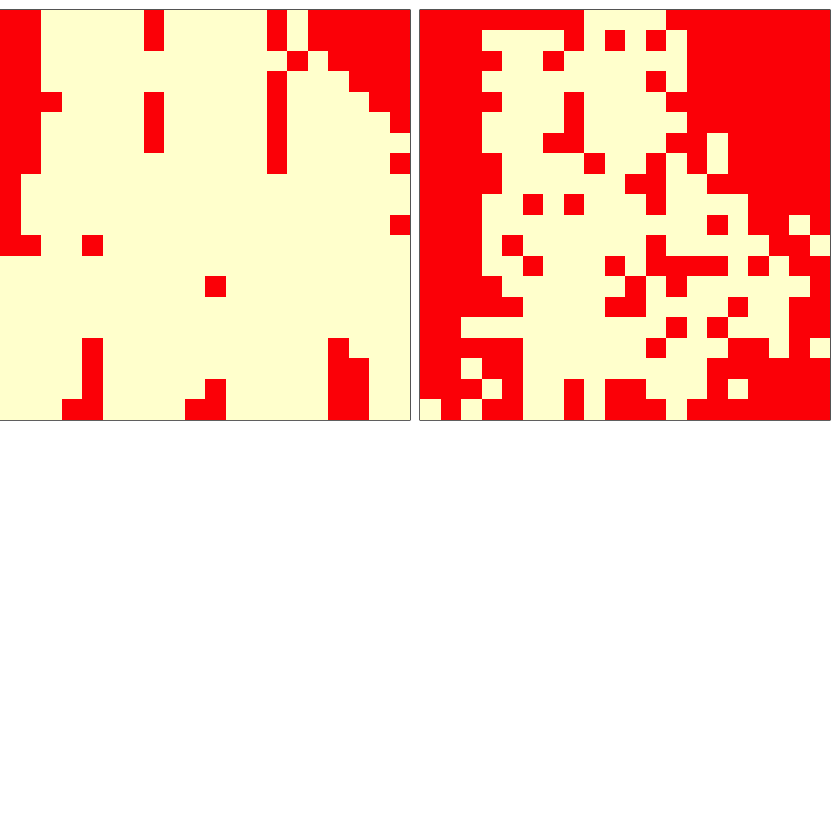

In [7]:
par(mfrow=c(2, 2))
par(mar=c(0, 0, 0.5, 0.5))
image(df2matrix(df, 'tree'), xaxt='n', yaxt='n')
image(df2matrix(df, 'beetle'), xaxt='n', yaxt='n')

In [8]:
head(df)

x,y,v1,v2,v3,v4,v5,v6,tree,beetle
1,1,0.3277771,0.25157541,0.31026947,0.209442769,2.0582977,-2.371458,1,1
2,1,0.2723134,0.19543477,0.23175797,0.304515028,2.9349596,-3.924469,1,0
3,1,0.3629680,-0.07802370,0.32653783,-0.004824218,0.7914931,9.368873,1,1
4,1,0.1067052,0.44667168,0.12396852,0.585209297,-2.5662348,10.651915,0,0
5,1,-0.1002563,-0.02902217,-0.09494731,-0.044011699,-3.2788635,18.223829,0,0
6,1,0.2408026,0.22744533,0.25973481,0.254564076,-1.4924739,28.879022,1,1


In [9]:
vars <- 3:7
pca <- princomp(df[, vars], cor=T)

In [10]:
summary(pca, loadings <- T)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.7185631 1.0358520 0.8784193 0.38418907 0.23308744
Proportion of Variance 0.5906919 0.2145979 0.1543241 0.02952025 0.01086595
Cumulative Proportion  0.5906919 0.8052897 0.9596138 0.98913405 1.00000000

Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
v1  0.518  0.237  0.394         0.722
v2 -0.508  0.222  0.366  0.742       
v3  0.504  0.273  0.428  0.136 -0.685
v4 -0.468  0.257  0.533 -0.655       
v5        -0.868  0.494              

In [11]:
str(pca)

List of 7
 $ sdev    : Named num [1:5] 1.719 1.036 0.878 0.384 0.233
  ..- attr(*, "names")= chr [1:5] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ loadings: 'loadings' num [1:5, 1:5] 0.5178 -0.5079 0.504 -0.4679 0.0313 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "v1" "v2" "v3" "v4" ...
  .. ..$ : chr [1:5] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ center  : Named num [1:5] 0.424 -2.678 0.42 -2.918 2.242
  ..- attr(*, "names")= chr [1:5] "v1" "v2" "v3" "v4" ...
 $ scale   : Named num [1:5] 0.306 3.625 0.319 4.728 2.351
  ..- attr(*, "names")= chr [1:5] "v1" "v2" "v3" "v4" ...
 $ n.obs   : int 400
 $ scores  : num [1:400, 1:5] -1.059 -1.267 -0.924 -1.854 -2.43 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ call    : language princomp(x = df[, vars], cor = T)
 - attr(*, "class")= chr "princomp"


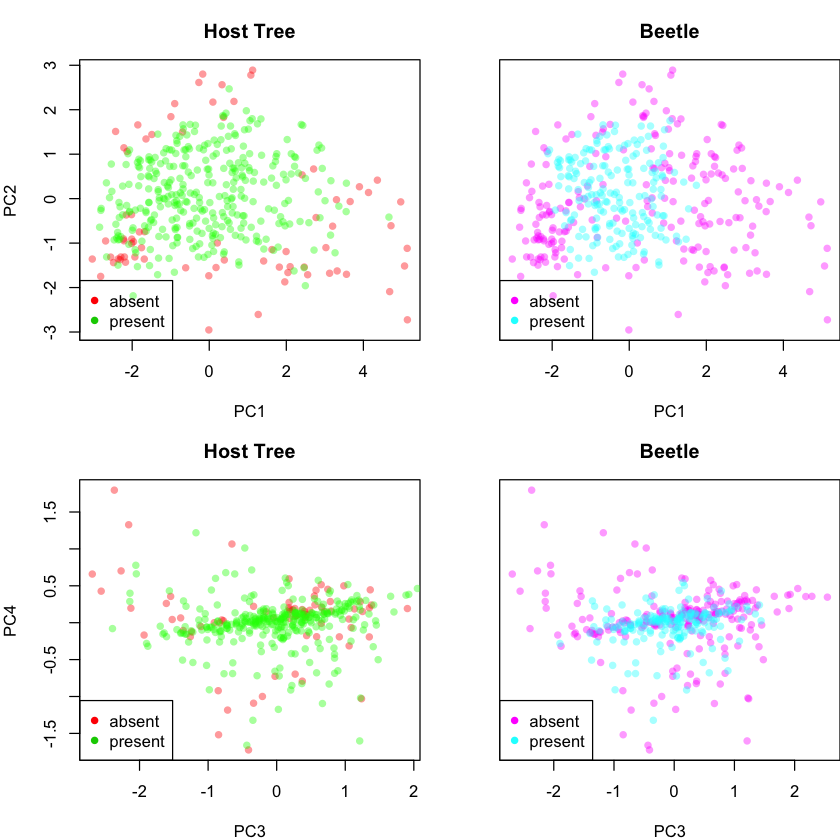

In [16]:
par(mfrow=c(2, 2))
par(mar=c(4, 4, 3, 0))
for(i in c(1, 3)) {
  plot(pca$scores[df$tree == 0, i], 
       pca$scores[df$tree == 0, i + 1], 
       col=rgb(1, 0, 0, 0.4), 
       pch=16,
       xlab=paste('PC', i, sep=''),
       ylab=paste('PC', i + 1, sep=''), 
       main='Host Tree')
  points(pca$scores[df$tree == 1, i],
         pca$scores[df$tree == 1, i + 1],
         pch=16,
         col=rgb(0, 1, 0, 0.4))
  legend('bottomleft', pch=16, col=c(2, 3), legend=c('absent', 'present'))
  plot(pca$scores[df$beetle == 0, i], 
       pca$scores[df$beetle == 0, i + 1], 
       col=rgb(1, 0, 1, 0.4), 
       pch=16,
       xlab=paste('PC', i, sep=''),
       ylab='', 
       yaxt='n',
       main='Beetle')
  points(pca$scores[df$beetle == 1, i],
         pca$scores[df$beetle == 1, i + 1],
         pch=16,
         col=rgb(0, 1, 1, 0.4))
  legend('bottomleft', pch=16, col=c(6, 5), legend=c('absent', 'present'))

}
